In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
#!pip install -U imbalanced-learn
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
def make_predictions (clf, accuracy_train, accuracy_test) :
    
    clf.fit(X_train, y_train)

    pred_test = clf.predict(X_test)
    accuracy_test.append(accuracy_score(y_true=y_test, y_pred=pred_test))

    pred_train = clf.predict(X_train)
    accuracy_train.append(accuracy_score(y_true=y_train, y_pred=pred_train))
    
    return accuracy_train, accuracy_test

In [71]:
def plot_param_vs_acc (param, accuracy_train, accuracy_test, param_name) :

    acc_fig = plt.figure()
    ax = acc_fig.add_axes([0,0,1,1])
    ax.plot(param, accuracy_train, label="train", color='#FDEDEC', linewidth=5)
    ax.plot(param, accuracy_test, label='test', color='#D4E6F1', linewidth=5)
    ax.legend()
    ax.set_title('Accuracy vs. {}'.format(param_name))
    ax.set_xlabel(param_name)
    ax.set_ylabel('accuracy')

In [18]:
df = pd.read_csv("data.csv")
#print(df.head())
data = df.drop(columns=['Unnamed: 0', 'Customer ID'])

le = LabelEncoder()
data['Is Back'] = le.fit_transform(data['Is Back'])

data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day of Week'] = data['Date'].dt.dayofweek

data.head()

,Total Quantity,Total Price,Country,Date,Is Back,Purchase Count,Year,Month,Day,Day of Week
0,-1,-1.25,United Kingdom,2010-12-02,0,1,2010,12,2,3
1,85,13.52,Italy,2011-10-31,1,19,2011,10,31,0
2,298,15.90,United Kingdom,2011-05-18,1,33,2011,5,18,2
3,399,8.30,United Kingdom,2011-10-16,0,62,2011,10,16,6
4,27,11.90,United Kingdom,2011-01-17,1,16,2011,1,17,0


In [19]:
clean_data = data.drop(columns=['Date'])
clean_data = clean_data[(clean_data['Total Price'] >= 0)]
clean_data = clean_data[(clean_data['Total Quantity'] >= 0)]
clean_data = clean_data.reset_index(drop=True)
clean_data.head()

,Total Quantity,Total Price,Country,Is Back,Purchase Count,Year,Month,Day,Day of Week
0,85,13.52,Italy,1,19,2011,10,31,0
1,298,15.90,United Kingdom,1,33,2011,5,18,2
2,399,8.30,United Kingdom,0,62,2011,10,16,6
3,27,11.90,United Kingdom,1,16,2011,1,17,0
4,564,204.00,United Kingdom,1,13,2010,12,12,6


In [20]:
# split dataset in features and target variable
X = clean_data.drop(columns=['Is Back'])  # Features
y = clean_data['Is Back']  # Target variable

In [21]:
X.head()

,Total Quantity,Total Price,Country,Purchase Count,Year,Month,Day,Day of Week
0,85,13.52,Italy,19,2011,10,31,0
1,298,15.90,United Kingdom,33,2011,5,18,2
2,399,8.30,United Kingdom,62,2011,10,16,6
3,27,11.90,United Kingdom,16,2011,1,17,0
4,564,204.00,United Kingdom,13,2010,12,12,6


In [22]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Is Back, dtype: int32

In [23]:
X['Country'] = le.fit_transform(X['Country'])
X.head()

,Total Quantity,Total Price,Country,Purchase Count,Year,Month,Day,Day of Week
0,85,13.52,18,19,2011,10,31,0
1,298,15.90,35,33,2011,5,18,2
2,399,8.30,35,62,2011,10,16,6
3,27,11.90,35,16,2011,1,17,0
4,564,204.00,35,13,2010,12,12,6


In [24]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=101)
# X_resampled, y_resampled = ros.fit_resample(X, y)
# print(sorted(Counter(y_resampled).items()))
# print()
# print(X_resampled.tail())

# # from imblearn.over_sampling import SMOTE
# # sm = SMOTE(random_state =101)
# # X_resampled, y_resampled = sm.fit_sample(X, y.ravel())
# # print(sorted(Counter(y_resampled).items()))
# # print()
# # print(X_resampled.tail())

In [25]:
from sklearn.feature_selection import mutual_info_classif

Text(0, 0.5, 'Gain')

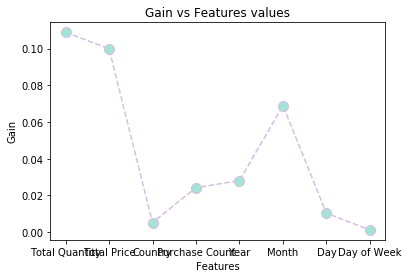

In [26]:
mic = mutual_info_classif(X, y, discrete_features=True)
plt.plot(X.columns, mic, color='#D7BDE2', linestyle='dashed', marker='o', markerfacecolor='#A3E4D7', markersize=10)
plt.title('Gain vs Features values')
plt.xlabel('Features')
plt.ylabel('Gain')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=101) 

In [29]:
clf = DecisionTreeClassifier(random_state=101, criterion='entropy')
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [30]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [31]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

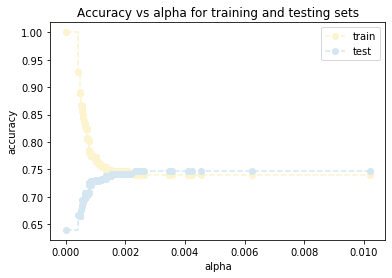

In [44]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, label="train", drawstyle="steps-post", color='#FCF3CF', linestyle="dashed", marker='o')
ax.plot(ccp_alphas, test_scores, label="test", drawstyle="steps-post", color='#D4E6F1', linestyle="dashed", marker='o')
ax.legend()
plt.show()

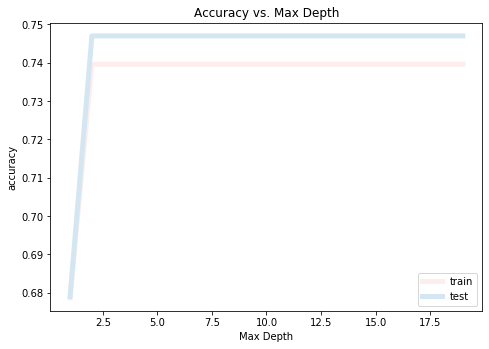

In [72]:
error_rate = []

accuracy_test = []
accuracy_train = []

depths = range(1, 20)

for depth in depths:

    dtree = DecisionTreeClassifier(max_depth=depth, random_state=101, ccp_alpha=0.0023)
    accuracy_train, accuracy_test = make_predictions(dtree, accuracy_train, accuracy_test)

plot_param_vs_acc(depths, accuracy_train, accuracy_test, "Max Depth")

In [73]:
dtree = DecisionTreeClassifier(max_depth = 3, ccp_alpha=0.0023, criterion='entropy')
#dtree = DecisionTreeClassifier(max_depth = 3, ccp_alpha=0.0023)
dtree.fit(X_train, y_train)
y_pred_test = dtree.predict(X_test)
y_pred_train = dtree.predict(X_train)
print(confusion_matrix(y_test, y_pred_test))
print()
print('Precision: ', precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted'))
print('Recall: ', recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted'))
print()
print('TrainAccuracy: ', accuracy_score(y_true=y_train, y_pred=y_pred_train))
print('Test Accuracy: ', accuracy_score(y_true=y_test, y_pred=y_pred_test))

[[ 96 173]
 [ 39 530]]

Precision:  0.7401726811599944
Recall:  0.747016706443914

TrainAccuracy:  0.7396237682890415
Test Accuracy:  0.747016706443914


In [74]:
from sklearn.tree import plot_tree

In [75]:
features = list(X.columns)
features

['Total Quantity',
 'Total Price',
 'Country',
 'Purchase Count',
 'Year',
 'Month',
 'Day',
 'Day of Week']

In [86]:
classes = list(y.unique())

[Text(136.96363636363637, 190.26, 'Year <= -0.751\nentropy = 0.906\nsamples = 3349\nvalue = [1076, 2273]'),
 Text(60.872727272727275, 135.9, 'Total Quantity <= -0.361\nentropy = 0.504\nsamples = 665\nvalue = [74, 591]'),
 Text(30.436363636363637, 81.53999999999999, 'entropy = 0.662\nsamples = 227\nvalue = [39, 188]'),
 Text(91.30909090909091, 81.53999999999999, 'entropy = 0.402\nsamples = 438\nvalue = [35, 403]'),
 Text(213.05454545454546, 135.9, 'Month <= 0.639\nentropy = 0.953\nsamples = 2684\nvalue = [1002, 1682]'),
 Text(152.1818181818182, 81.53999999999999, 'Month <= -1.128\nentropy = 0.87\nsamples = 2112\nvalue = [614, 1498]'),
 Text(121.74545454545455, 27.180000000000007, 'entropy = 0.694\nsamples = 606\nvalue = [113, 493]'),
 Text(182.61818181818182, 27.180000000000007, 'entropy = 0.918\nsamples = 1506\nvalue = [501, 1005]'),
 Text(273.92727272727274, 81.53999999999999, 'Month <= 1.144\nentropy = 0.906\nsamples = 572\nvalue = [388, 184]'),
 Text(243.4909090909091, 27.1800000000

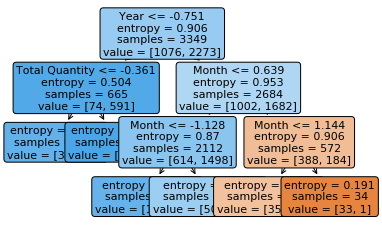

In [94]:
plot_tree(dtree, feature_names=features, filled=True, rounded=True, fontsize=11)

In [98]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
data_feat = pd.DataFrame(scaled_features, columns=X.columns)
#print(data_feat.head())
X_scaled = data_feat
X_scaled.head()

,Total Quantity,Total Price,Country,Purchase Count,Year,Month,Day,Day of Week
0,-0.377948,-0.036228,-2.473303,-0.226948,0.499477,0.765147,1.988744,-1.409191
1,0.099472,-0.034247,0.291084,0.373487,0.499477,-0.496836,0.470925,-0.314112
2,0.325854,-0.040573,0.291084,1.617245,0.499477,0.765147,0.237415,1.876044
3,-0.507949,-0.037577,0.291084,-0.355613,0.499477,-1.506422,0.354170,-1.409191
4,0.695686,0.122314,0.291084,-0.484277,-2.002092,1.269940,-0.229607,1.876044


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=101)

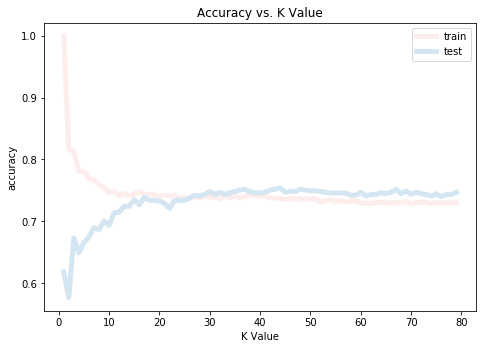

In [100]:
error_rate = []
accuracy_test = []
accuracy_train = []

ks = range(1, 80)
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy_train, accuracy_test = make_predictions(knn, accuracy_train, accuracy_test)

plot_param_vs_acc(ks, accuracy_train, accuracy_test, 'K Value')

In [101]:
knn = KNeighborsClassifier(n_neighbors=43)
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
print(confusion_matrix(y_test, y_pred_test))
print()
print('Precision: ', precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted'))
print('Recall: ', recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted'))
print()
print('Train Accuracy: ', accuracy_score(y_true=y_train, y_pred=y_pred_train))
print('Test Accuracy: ', accuracy_score(y_true=y_test, y_pred=y_pred_test))

[[108 161]
 [ 47 522]]

Precision:  0.7426072540037538
Recall:  0.7517899761336515

Train Accuracy:  0.7378321887130487
Test Accuracy:  0.7517899761336515


In [102]:
X = clean_data.drop(columns=['Is Back'])  # Features
y = clean_data['Is Back']  # Target variable

In [103]:
lb = LabelBinarizer()
transformed = lb.fit_transform(X['Country'])
ohe_df = pd.DataFrame(transformed)
X_encoded = pd.concat([X, ohe_df], axis=1).drop(['Country'], axis=1)

X_encoded

,Total Quantity,Total Price,Purchase Count,Year,Month,Day,Day of Week,0,1,2,...,27,28,29,30,31,32,33,34,35,36
0,85,13.52,19,2011,10,31,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,298,15.90,33,2011,5,18,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,399,8.30,62,2011,10,16,6,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,27,11.90,16,2011,1,17,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,564,204.00,13,2010,12,12,6,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4182,58,20.40,5,2011,3,20,6,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4183,582,5.04,62,2011,10,11,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4184,231,15.00,16,2011,7,25,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4185,57,17.70,8,2011,5,26,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [104]:
scaler = StandardScaler()
scaler.fit(X_encoded)
scaled_features = scaler.fit_transform(X_encoded)
X_scaled = pd.DataFrame(scaled_features, columns=X_encoded.columns)
X_scaled.head()

,Total Quantity,Total Price,Purchase Count,Year,Month,Day,Day of Week,0,1,2,...,27,28,29,30,31,32,33,34,35,36
0,-0.377948,-0.036228,-0.226948,0.499477,0.765147,1.988744,-1.409191,-0.043753,-0.043753,-0.021861,...,-0.015456,-0.015456,-0.015456,-0.082051,-0.040922,-0.067517,-0.030923,-0.021861,-3.072686,-0.030923
1,0.099472,-0.034247,0.373487,0.499477,-0.496836,0.470925,-0.314112,-0.043753,-0.043753,-0.021861,...,-0.015456,-0.015456,-0.015456,-0.082051,-0.040922,-0.067517,-0.030923,-0.021861,0.325448,-0.030923
2,0.325854,-0.040573,1.617245,0.499477,0.765147,0.237415,1.876044,-0.043753,-0.043753,-0.021861,...,-0.015456,-0.015456,-0.015456,-0.082051,-0.040922,-0.067517,-0.030923,-0.021861,0.325448,-0.030923
3,-0.507949,-0.037577,-0.355613,0.499477,-1.506422,0.354170,-1.409191,-0.043753,-0.043753,-0.021861,...,-0.015456,-0.015456,-0.015456,-0.082051,-0.040922,-0.067517,-0.030923,-0.021861,0.325448,-0.030923
4,0.695686,0.122314,-0.484277,-2.002092,1.269940,-0.229607,1.876044,-0.043753,-0.043753,-0.021861,...,-0.015456,-0.015456,-0.015456,-0.082051,-0.040922,-0.067517,-0.030923,-0.021861,0.325448,-0.030923


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=101)

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [107]:
lr = LogisticRegression(random_state=101)
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty, solver=solver)

# Create grid search using 5-fold cross validation
#clf = GridSearchCV(lr, hyperparameters, cv=5)
clf = RandomizedSearchCV(lr, hyperparameters, cv=5, n_iter=20) 
# Fit grid search
best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best Solver:', best_model.best_estimator_.get_params()['solver'])
    

c:\users\mahsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\mahsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\mahsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\mahsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\mahsa\appdata\local\pro

c:\users\mahsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\mahsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\mahsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\mahsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\mahsa\appdata\local\pro

Best Penalty: l2
Best C: 2.7825594022071245
Best Solver: lbfgs


c:\users\mahsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [108]:
# Predict target vector
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

print(confusion_matrix(y_test, y_pred_test))
print()
print('Precision: ', precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted'))
print('Recall: ', recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted'))
print()
print('Train Accuracy: ', accuracy_score(y_true=y_train, y_pred=y_pred_train))
print('Test Accuracy: ', accuracy_score(y_true=y_test, y_pred=y_pred_test))

[[131 138]
 [ 78 491]]

Precision:  0.7312307965270569
Recall:  0.7422434367541766

Train Accuracy:  0.7396237682890415
Test Accuracy:  0.7422434367541766


In [109]:
# split dataset in features and target variable
X = clean_data.drop(columns=['Is Back'])  # Features
y = clean_data['Is Back']  # Target variable

In [110]:
X['Country'] = le.fit_transform(X['Country'])

In [111]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
data_feat = pd.DataFrame(scaled_features, columns=X.columns)
#print(data_feat.head())
X_scaled = data_feat
X_scaled.head()

,Total Quantity,Total Price,Country,Purchase Count,Year,Month,Day,Day of Week
0,-0.377948,-0.036228,-2.473303,-0.226948,0.499477,0.765147,1.988744,-1.409191
1,0.099472,-0.034247,0.291084,0.373487,0.499477,-0.496836,0.470925,-0.314112
2,0.325854,-0.040573,0.291084,1.617245,0.499477,0.765147,0.237415,1.876044
3,-0.507949,-0.037577,0.291084,-0.355613,0.499477,-1.506422,0.354170,-1.409191
4,0.695686,0.122314,0.291084,-0.484277,-2.002092,1.269940,-0.229607,1.876044


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=101)

In [113]:
from sklearn.ensemble import BaggingClassifier

In [114]:
bc_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=45, random_state=101).fit(X_train, y_train)
y_pred_test = bc_dt.predict(X_test)
y_pred_train = bc_dt.predict(X_train)

print('Train Accuracy: ', accuracy_score(y_true=y_train, y_pred=y_pred_train))
print('Test Accuracy: ', accuracy_score(y_true=y_test, y_pred=y_pred_test))

Train Accuracy:  0.7396237682890415
Test Accuracy:  0.747016706443914


In [115]:
bc_knn = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=43), n_estimators=50, random_state=101).fit(X_train, y_train)
y_pred_test = bc_knn.predict(X_test)
y_pred_train = bc_knn.predict(X_train)

print('Train Accuracy: ', accuracy_score(y_true=y_train, y_pred=y_pred_train))
print('Test Accuracy: ', accuracy_score(y_true=y_test, y_pred=y_pred_test))

Train Accuracy:  0.7396237682890415
Test Accuracy:  0.747016706443914


In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rfc = RandomForestClassifier(n_estimators=30, random_state=101)
rfc.fit(X_train, y_train)
rfc_pred_test = rfc.predict(X_test)
rfc_pred_train = rfc.predict(X_train)

print('Train Accuracy: ', accuracy_score(y_true=y_train, y_pred=rfc_pred_train))
print('Test Accuracy: ', accuracy_score(y_true=y_test, y_pred=rfc_pred_test))

Train Accuracy:  0.9988056136160047
Test Accuracy:  0.7100238663484487


In [118]:
rfc = RandomForestClassifier(random_state=101)

n_estimators=range(10,80)
max_depth = range(1,20)
min_samples_leaf = range(1,10)
max_features = ['auto', 'sqrt', 'log2']
max_leaf_nodes = range(2,30)
# Create hyperparameter options
hyperparameters = dict(max_depth=max_depth, min_samples_leaf=min_samples_leaf, max_features=max_features, n_estimators=n_estimators, max_leaf_nodes=max_leaf_nodes)

# Create grid search using 5-fold cross validation
#clf = GridSearchCV(lr, hyperparameters, cv=5)
clf = RandomizedSearchCV(rfc, hyperparameters, cv=5, n_iter=20) 
# Fit grid search
best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best  min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', best_model.best_estimator_.get_params()['max_features'])
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_leaf_nodes:', best_model.best_estimator_.get_params()['max_leaf_nodes'])


Best max_depth: 18
Best  min_samples_leaf: 2
Best max_features: log2
Best n_estimators: 54
Best max_leaf_nodes: 25


In [124]:
rfc = best_model
rfc.fit(X_train, y_train)
rfc_pred_test = rfc.predict(X_test)
rfc_pred_train = rfc.predict(X_train)

print('Train Accuracy: ', accuracy_score(y_true=y_train, y_pred=rfc_pred_train))
print('Test Accuracy: ', accuracy_score(y_true=y_test, y_pred=rfc_pred_test))

Train Accuracy:  0.7551507912809794
Test Accuracy:  0.7458233890214797


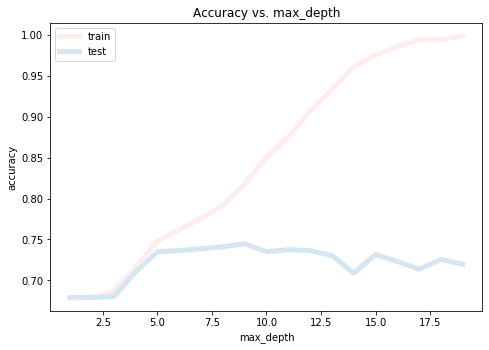

In [128]:
accuracy_test = []
accuracy_train = []

depths = range(1,20)

for depth in max_depth:

    rfc = RandomForestClassifier(max_depth=depth, random_state=101)
    accuracy_train, accuracy_test = make_predictions(rfc, accuracy_train, accuracy_test)

plot_param_vs_acc(depths, accuracy_train, accuracy_test, "max_depth")

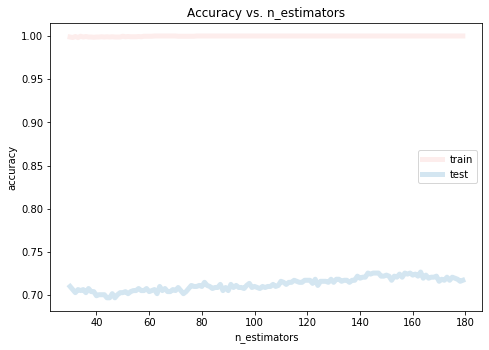

In [120]:
accuracy_test = []
accuracy_train = []

n_estimators = range(30,180)

for n in n_estimators:

    rfc = RandomForestClassifier(n_estimators=n, random_state=101)
    accuracy_train, accuracy_test = make_predictions(rfc, accuracy_train, accuracy_test)

plot_param_vs_acc(n_estimators, accuracy_train, accuracy_test, "n_estimators")

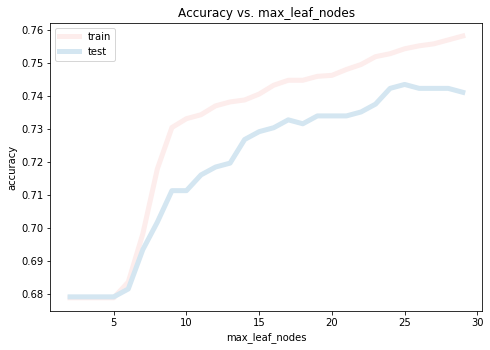

In [121]:
accuracy_test = []
accuracy_train = []

max_leaf_nodes=range(2,30)

for n in max_leaf_nodes:

    rfc = RandomForestClassifier(max_leaf_nodes=n, random_state=101)
    
    accuracy_train, accuracy_test = make_predictions(rfc, accuracy_train, accuracy_test)

plot_param_vs_acc(max_leaf_nodes, accuracy_train, accuracy_test, "max_leaf_nodes")

In [122]:
from sklearn.ensemble import VotingClassifier

In [123]:
dt = DecisionTreeClassifier(max_depth=3)
knn = KNeighborsClassifier(n_neighbors=43)
lr = LogisticRegression()
vclf = VotingClassifier(estimators=[('decision tree', dt), ('k neighbors', knn), ('logistic regression', lr)])
vclf.fit(X_train, y_train)

y_pred_train = vclf.predict(X_train)
y_pred_test = vclf.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_true=y_train, y_pred=y_pred_train))
print('Test Accuracy: ', accuracy_score(y_true=y_test, y_pred=y_pred_test))

Train Accuracy:  0.7411167512690355
Test Accuracy:  0.7577565632458234
